# This notebook was created to assess convergent evolution (i.e. homoplasy score) for mutations in the loci interrogated for this study.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import sys
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

####################################################################################################################################################################################

# [1] Load in Homoplasy Scores from *SNPPar* for SNPs & *TopDis (spacer length = 4)* for INDELs

### This data was loaded from another study assessing parallel evolution (i.e. homoplasy score) for all mutations detected across the genome in 31,428 isolates: "Phase variation as a major mechanism of adaptation in *Mycobacterium tuberculosis* complex"

####################################################################################################################################################################################

In [3]:
#load in SNPs
all_homoplasic_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/homoplasy_count_across_lineages.pkl')

#load in INDELs
all_homoplasic_INDELs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/INDEL homoplasies/homoplasy_count_across_lineages_spacer_4.pkl')

### SNPs

In [4]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844


In [5]:
np.shape(all_homoplasic_SNPs)

(834981, 20)

create **key** column for SNPs

In [6]:
all_homoplasic_SNPs_key_col = [ref + '_' + str(int(pos)) + '_' + alt for ref,pos,alt in zip(all_homoplasic_SNPs.ref,all_homoplasic_SNPs.pos,all_homoplasic_SNPs.alt)]
all_homoplasic_SNPs.loc[:,'key'] = all_homoplasic_SNPs_key_col

In [7]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,...,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt,key
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,...,297,306,310,179,8,6,1717,katG,8066,C_2155168_G
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,...,199,222,311,173,8,3,1406,rpoB,5706,C_761155_T
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,...,102,65,53,51,6,2,779,rpsL,3509,A_781687_G
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,...,67,76,99,60,2,1,743,embB,2102,A_4247429_G
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,...,67,77,53,25,0,0,552,gyrA,844,A_7582_G


In [21]:
SNP_variant_keys = set(all_homoplasic_SNPs.key)

In [22]:
len(SNP_variant_keys)

834961

### INDELs

In [8]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,1,2,3,4A,4B,4C,5,6,total,num_isolates
50204,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,41.0,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388
50198,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,23.0,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212
50144,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,21.0,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182
26713,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,1.0,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48
50146,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,5.0,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52


In [9]:
np.shape(all_homoplasic_INDELs)

(46306, 22)

create **key** column for INDELs

In [10]:
all_homoplasic_INDELs_key_col = [ref + '_' + str(int(pos)) + '_' + alt for ref,pos,alt in zip(all_homoplasic_INDELs.ref,all_homoplasic_INDELs.pos,all_homoplasic_INDELs.alt)]
all_homoplasic_INDELs.loc[:,'key'] = all_homoplasic_INDELs_key_col

In [11]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,1,2,3,4A,4B,4C,5,6,total,num_isolates
50204,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,41.0,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388
50198,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,23.0,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212
50144,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,21.0,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182
26713,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,1.0,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48
50146,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,5.0,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52


In [23]:
INDEL_variant_keys = set(all_homoplasic_INDELs.key)

In [24]:
len(INDEL_variant_keys)

46306

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

####################################################################################################################################################################################

# [2] Load in mutations detected in *mmpR*, *mmpL5*, *mmpS5*, *ahpC*, *whiB7*, *eis* and upstream regions for *ahpC*, *whiB7*, *eis*

####################################################################################################################################################################################

These mutations are taken from **Supplementary Table 1** after it has been created.

In [12]:
mutations_of_interest_df = pd.read_excel('/n/data1/hms/dbmi/farhat/Roger/mmpR_BDQ_mutant_project/CSV files/mutations_detected_within_isolates/Supplementary Table 1.xlsx')

#drop unneccessary cols
mutations_of_interest_df.drop(labels=['relative to start', 'relative to TSS', '*Cepheid Xpert MTB/XDR Assay'], axis=1, inplace = True)

#drop unneccessary rows
mutations_of_interest_df.drop(labels=mutations_of_interest_df.loc[334:,:].index, axis=0, inplace = True)

In [13]:
mutations_of_interest_df.head()

,Position,Reference Allele,Alternate Allele,Gene Symbol,H37Rv locus tag,Gene Position,Mutation Type,Codon Position,# Isolates,# Sublineages,sublineages
0,775616,C,CG,mmpL5,Rv0676c,2865,ins,955,1.0,1.0,4.13(1)
1,775645,G,A,mmpL5,Rv0676c,2836,N,R946*,1.0,1.0,2.2.1.1.1(1)
2,775727,GGT,G,mmpL5,Rv0676c,2754,del,918,3.0,1.0,2.2.1.1.1(3)
3,775753,TG,T,mmpL5,Rv0676c,2728,del,910,14.0,1.0,5(14)
4,775876,C,CG,mmpL5,Rv0676c,2605,ins,869,2.0,1.0,1.1.1.1(2)


In [14]:
mutations_of_interest_df.tail()

,Position,Reference Allele,Alternate Allele,Gene Symbol,H37Rv locus tag,Gene Position,Mutation Type,Codon Position,# Isolates,# Sublineages,sublineages
329,3569048,G,A,whiB7-uvrD2,Rv3197A-Rv3198c,None,I,None,1.0,1.0,1.1.2(1)
330,3569058,G,A,whiB7-uvrD2,Rv3197A-Rv3198c,None,I,None,4.0,1.0,4.10.i1(4)
331,3569065,A,G,whiB7-uvrD2,Rv3197A-Rv3198c,None,I,None,66.0,4.0,4.3.i1(49) - 3.1.1(1) - 4.2.1.1.1.2.2.1(15) - ...
332,3569069,C,A,whiB7-uvrD2,Rv3197A-Rv3198c,None,I,None,1.0,1.0,3.1.1(1)
333,3569081,C,A,whiB7-uvrD2,Rv3197A-Rv3198c,None,I,None,2.0,1.0,1.1.2(2)


create **key** column for variants

In [15]:
mutations_of_interest_df_key_col = [ref + '_' + str(int(pos)) + '_' + alt for ref,pos,alt in zip(mutations_of_interest_df.loc[:,'Reference Allele'],mutations_of_interest_df.loc[:,'Position'],mutations_of_interest_df.loc[:,'Alternate Allele'])]
mutations_of_interest_df.loc[:,'key'] = mutations_of_interest_df_key_col

In [16]:
mutations_of_interest_df.head()

,Position,Reference Allele,Alternate Allele,Gene Symbol,H37Rv locus tag,Gene Position,Mutation Type,Codon Position,# Isolates,# Sublineages,sublineages,key
0,775616,C,CG,mmpL5,Rv0676c,2865,ins,955,1.0,1.0,4.13(1),C_775616_CG
1,775645,G,A,mmpL5,Rv0676c,2836,N,R946*,1.0,1.0,2.2.1.1.1(1),G_775645_A
2,775727,GGT,G,mmpL5,Rv0676c,2754,del,918,3.0,1.0,2.2.1.1.1(3),GGT_775727_G
3,775753,TG,T,mmpL5,Rv0676c,2728,del,910,14.0,1.0,5(14),TG_775753_T
4,775876,C,CG,mmpL5,Rv0676c,2605,ins,869,2.0,1.0,1.1.1.1(2),C_775876_CG


In [32]:
np.shape(mutations_of_interest_df)

(334, 12)

####################################################################################################################################################################################

# [3] Merge homoplasy counts to DataFrame with mutations of interest

####################################################################################################################################################################################

In [31]:
#iterate through each mutation and find the homoplasy count
homoplasy_count_list = []

for mut_key in mutations_of_interest_df.key:
    
    if mut_key in SNP_variant_keys:
        homoplasy_count_list.append(int(all_homoplasic_SNPs[all_homoplasic_SNPs.key == mut_key].total))
        
    elif mut_key in INDEL_variant_keys:
        homoplasy_count_list.append(int(all_homoplasic_INDELs[all_homoplasic_INDELs.key == mut_key].total))
        
    else:
        homoplasy_count_list.append(0) #SNPs & INDELs with homoplasy score = 0 were dropped from DataFrames

In [34]:
mutations_of_interest_df.loc[:,'Homoplasy Score'] = homoplasy_count_list

In [35]:
mutations_of_interest_df.head()

,Position,Reference Allele,Alternate Allele,Gene Symbol,H37Rv locus tag,Gene Position,Mutation Type,Codon Position,# Isolates,# Sublineages,sublineages,key,Homoplasy Score
0,775616,C,CG,mmpL5,Rv0676c,2865,ins,955,1.0,1.0,4.13(1),C_775616_CG,1
1,775645,G,A,mmpL5,Rv0676c,2836,N,R946*,1.0,1.0,2.2.1.1.1(1),G_775645_A,1
2,775727,GGT,G,mmpL5,Rv0676c,2754,del,918,3.0,1.0,2.2.1.1.1(3),GGT_775727_G,1
3,775753,TG,T,mmpL5,Rv0676c,2728,del,910,14.0,1.0,5(14),TG_775753_T,1
4,775876,C,CG,mmpL5,Rv0676c,2605,ins,869,2.0,1.0,1.1.1.1(2),C_775876_CG,1


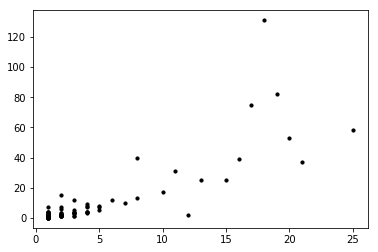

In [39]:
plt.scatter(mutations_of_interest_df.loc[:, '# Sublineages'], mutations_of_interest_df.loc[:, 'Homoplasy Score'], s = 10, c = 'k')

Output to copy/paste **Homplasy Score** column

In [40]:
mutations_of_interest_df.to_excel('/n/data1/hms/dbmi/farhat/Roger/mmpR_BDQ_mutant_project/CSV files/mutations_detected_within_isolates/Supplementary Table 1 with HP scores.xlsx')

Infer whether a variant is homoplasic by whether it is present in multiple **sub-lineages** or from **homoplasy score**

In [50]:
homoplasic_from_sublineage_count_boolean = list(mutations_of_interest_df.loc[:,'# Sublineages'] > 1)
homoplasic_from_homoplasy_score_boolean = list(mutations_of_interest_df.loc[:,'Homoplasy Score'] > 1)

In [51]:
sum(homoplasic_from_sublineage_count_boolean)

73

In [52]:
sum(homoplasic_from_homoplasy_score_boolean)

79

In [53]:
sum([(homoplasic_from_sublineage_count and homoplasic_from_homoplasy_score) for homoplasic_from_sublineage_count,homoplasic_from_homoplasy_score in zip(homoplasic_from_sublineage_count_boolean,homoplasic_from_homoplasy_score_boolean)])

66